# Olympics (Part 2) Regression Analysis
## Can we predict future medal tally?



Linear regression can describe the linear relationship between one or more independent variables (x-variables) and a dependent variable (y-variable).
Two types of linear regression
-   Simple = one independent variable (x)
- Multiple > 1 independent variable (x)

Linear regression can be thought as an extension to correlation where we typically assume cause and effect. Unlike correlation, linear regression tells us how much the dependent variable changes with each increase or decrease in the independent variable.

We are going to investigate using both uni and multiplie regression to explore if we can predict the medal count of countries at the olympic games

### Using this notebook

This notebook is similar in structure to the notebook on explortatory data analysis on this dataset. In the directory there are two notebooks; the notebook that contains the string skeletal notes has secitons missing for you to fill in as you work your way through the notebook. The other notebook contains the solutions. There are also supporting videos that give more of a narative as to how you get to the solution. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from olympics_answers import RegressionAnswers as ans
sns.set()

In [2]:
gdp = pd.read_csv('world_gdp.csv',skiprows=3) #  read the csv in 'world_gdp.csv'. Google skiprows key word argument. set it to 3
gdp.head() # view the data using .head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,...,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000190e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658740e+11,1.590490e+11
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In [3]:
gdp.columns # print out the columns in the data

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [4]:
columns = ['Country Name'] + [str(i) for i in range(1988, 2020, 4)] # Create a list that contains Country Name as first element and years 1988 up to and including 2016 with 4 year period
gdp = gdp[columns] # select the columns from the gdp dataframe as defined in the step above
gdp.rename(columns={'Country Name':'Country'},inplace=True) # use the rename function to change the name of Country Name to Country
gdp.tail() # use the .tail function to have a look at the last 5 records of GDP

,Country,1988,1992,1996,2000,2004,2008,2012,2016
214,"Virgin Islands, US",1.204600e+09,1.770900e+09,NaN,NaN,3.799000e+09,4.250000e+09,4.095000e+09,NaN
215,Palestine,NaN,NaN,3.409600e+09,4.313600e+09,4.329200e+09,6.673500e+09,1.127940e+10,1.339710e+10
216,Yemen,NaN,6.463650e+09,5.785685e+09,9.636342e+09,1.387350e+10,2.691085e+10,3.539315e+10,2.731761e+10
217,Zambia,3.713614e+09,3.181922e+09,3.597221e+09,3.600683e+09,6.221078e+09,1.791086e+10,2.550337e+10,2.106399e+10
218,Zimbabwe,7.814784e+09,6.751472e+09,8.553147e+09,6.689958e+09,5.805598e+09,4.415703e+09,1.424249e+10,1.661996e+10


Pd. melt allows you to 'unpivot' data from a 'wide format' into a 'long format', perfect for my task taking 'wide format' economic data with each column representing a year, and turning it into 'long format' data with each row representing a data point

In [5]:
gdp = pd.melt(gdp, 
            id_vars= "Country", # column to use as the identifier variable. In this case we want this to be the Country
            value_vars=list(gdp.columns[1:]), # list of the column headers that need to be unpivoted. This will be the 0th to the last element of a list of columns in gdp 
            var_name= "Year", # A string name of the new column. We have un pivoted the years so a good name for this would be the "Year" 
            value_name= "GDP") # the final column will contain the values for the table. This needs a title 
gdp.sort_values(['Country','Year'],ascending = [True,True],inplace=True)
gdp.head()

,Country,Year,GDP
0,Afghanistan,1988,NaN
219,Afghanistan,1992,NaN
438,Afghanistan,1996,NaN
657,Afghanistan,2000,NaN
876,Afghanistan,2004,5.285466e+09


In [6]:
gdp['Year'] = gdp['Year'].astype(int) # convert the type of the column year from gdp dataframe to an integer from a string

medals_tally = pd.read_csv('medals_tally.csv') # load in the medals_tally.csv data

In [7]:
# Below select only the medalsy_tally records where the year is > 1984 . Then group by the Year and Country aggregating by the sum. Reset the index
medals_by_country = medals_tally.loc[medals_tally['Year']>1984].groupby(['Year','Country'])['Medal_Count'].sum().reset_index() 
medals_by_country.head()


,Year,Country,Medal_Count
0,1988,Argentina,2.0
1,1988,Australia,14.0
2,1988,Austria,1.0
3,1988,Belgium,2.0
4,1988,Brazil,6.0


<div class="alert alert-block alert-warning">
<b>Question</b>
q1 What was the medal count of Argentina during the year 1988 at the summer games?<br>
</div>

In [8]:
#q1 What was the medal count of Argentina during the year 1988 at the summer games?
# ans.q1_check_answer()
# ans.q1_get_answer()

In [9]:
# merge the medals_by_country with gdp on year and country. Validate using one to one and set the indicator to True
medals_tally_gdp = medals_by_country.merge(gdp,
                                   left_on = ['Year', 'Country'],
                                   right_on = ['Year', 'Country'],
                                   how = 'left',
                                   indicator = True,
                                   validate = "one_to_one")
                                         
medals_tally_gdp.head()


,Year,Country,Medal_Count,GDP,_merge
0,1988,Argentina,2.0,1.262070e+11,both
1,1988,Australia,14.0,2.361360e+11,both
2,1988,Austria,1.0,1.333390e+11,both
3,1988,Belgium,2.0,1.631680e+11,both
4,1988,Brazil,6.0,3.303970e+11,both


<div class="alert alert-block alert-warning">
<b>Question</b>
q2 What is the GDP of Austria in 1988 to 2SF?<br>
</div>

In [10]:
#q2 What is the GDP of Austria in 1988 to 2SF?
medals_tally_gdp.query("Country == 'Austria'")
# ans.q2_get_answer()

,Year,Country,Medal_Count,GDP,_merge
2,1988,Austria,1.0,1.333390e+11,both
54,1992,Austria,2.0,1.950780e+11,both
119,1996,Austria,3.0,2.372510e+11,both
197,2000,Austria,3.0,1.968000e+11,both
275,2004,Austria,7.0,3.009040e+11,both
351,2008,Austria,3.0,4.302940e+11,both
520,2016,Austria,2.0,3.908000e+11,both


In [11]:
# How many GDP values are missing as a percentage of all the values
print(100 * medals_tally_gdp.GDP.isna().sum() / medals_tally_gdp.shape[0], '% of data missing')
len(medals_tally_gdp)

5.149501661129568 % of data missing


602

<div class="alert alert-block alert-warning">
<b>Question</b>
q3 What percentage of the data (nearest integer) is missing after our cleaning steps?<br>
</div>

In [12]:
# What percentage of the data (nearest integer) is missing after our cleaning steps?
# ans.q3_check_answer()
# ans.q3_get_answer()

In [13]:
medals_tally_gdp.dropna(inplace = True)

In [14]:
data = pd.read_csv('cleaned_data.csv') # read in the cleaned data from the previous analysis. cleaned_data.csv
# create a new df called team size. THis needs to take the data filter by season to summer and year to be greater than 1984, group by the year and country, count the number of unique ids and reset the index !

In [15]:
team_size = data[(data['Season'] == 'Summer')  & (data['Year'] >= 1988)].drop_duplicates().groupby(['Year', 'Country']).ID.nunique().reset_index(name = 'Team_Size')


In [16]:
medals_tally_gdp.drop(columns = ['_merge'], inplace = True) # drop the _merge column as we do not need this anymore. remeber to use the keyword argument inplace

In [17]:
# create a datset called train. THis will be created from a merge between medals_tally gdp and team size. Expect to have an output with the columns Year Country Medal COunt GDP and Team Size 
train = medals_tally_gdp.merge(team_size,left_on=['Year','Country'],right_on=['Year','Country'],how='left', validate = "one_to_one", indicator = False) 
train.head()


,Year,Country,Medal_Count,GDP,Team_Size
0,1988,Argentina,2.0,1.262070e+11,118
1,1988,Australia,14.0,2.361360e+11,252
2,1988,Austria,1.0,1.333390e+11,73
3,1988,Belgium,2.0,1.631680e+11,59
4,1988,Brazil,6.0,3.303970e+11,160


<div class="alert alert-block alert-warning">
<b>Question</b>
q4 What is the team size of Brazil during 1988?<br>
</div>

In [18]:
# q4 What is the team size of Brazil during 1988??
# ans.q4_check_answer()
# ans.q4_get_answer()

In [19]:
# read in the csv file 'world_pop.csv'. Apply the use cols parameter to only bring in the columns that we want https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# The columns that we want are ['Country','1988','1992','1996','2000','2004','2008','2012','2016']
pop = pd.read_csv('world_pop.csv',
                  usecols=['Country','1988','1992','1996','2000','2004','2008','2012','2016']) 
pop.head() # view the new frame pop

,Country,1988,1992,1996,2000,2004,2008,2012,2016
0,Aruba,61079.0,68235.0,83200.0,90853,98737.0,101353.0,102577.0,104822
1,Afghanistan,11540888.0,13981231.0,17822884.0,20093756,24118979.0,27294031.0,30696958.0,34656032
2,Angola,11513968.0,12968345.0,14682284.0,16440924,18865716.0,21759420.0,25096150.0,28813463
3,Albania,3142336.0,3247039.0,3168033.0,3089027,3026939.0,2947314.0,2900401.0,2876101
4,Andorra,50434.0,58888.0,64360.0,65390,76244.0,83861.0,82431.0,77281


In [20]:
# Use the melt method in pandas to reshape the data https://www.w3resource.com/pandas/dataframe/dataframe-melt.php
# Currently the data has columns country and the subsequent years. We want to reshape the data so it has 3 columns country year and population
# In this case the id will be the country and the values that we want in the next column is the list of the years from the column headers. The values will take the values of the previous data frame with the value name as population
pop = pd.melt(pop,
              id_vars='Country', # set the id var as 'Country'
            value_vars=list(pop.columns[1:]), # set the value vars to be a list of the pop.columns from the first column to the last column. e.g not including year. 
            var_name='Year', # name the new column year
            value_name='Population') # name the value column as population. 

pop.head()

,Country,Year,Population
0,Aruba,1988,61079.0
1,Afghanistan,1988,11540888.0
2,Angola,1988,11513968.0
3,Albania,1988,3142336.0
4,Andorra,1988,50434.0


In [21]:
pop.info()
pop['Year'] = pop['Year'].astype(int) #  change the year type to an integer using the astype method. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     1736 non-null   object 
 1   Year        1736 non-null   object 
 2   Population  1730 non-null   float64
dtypes: float64(1), object(2)
memory usage: 40.8+ KB


In [22]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     1736 non-null   object 
 1   Year        1736 non-null   int32  
 2   Population  1730 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 34.0+ KB


In [23]:
train= train.merge(pop,on=['Year','Country'],how='left', validate =  "one_to_one") # merge the train dataframe with the pop data frame on both year and country. call this dataframe train. 


train.head()

,Year,Country,Medal_Count,GDP,Team_Size,Population
0,1988,Argentina,2.0,1.262070e+11,118,31795517.0
1,1988,Australia,14.0,2.361360e+11,252,16532200.0
2,1988,Austria,1.0,1.333390e+11,73,7585317.0
3,1988,Belgium,2.0,1.631680e+11,59,9901664.0
4,1988,Brazil,6.0,3.303970e+11,160,144001542.0


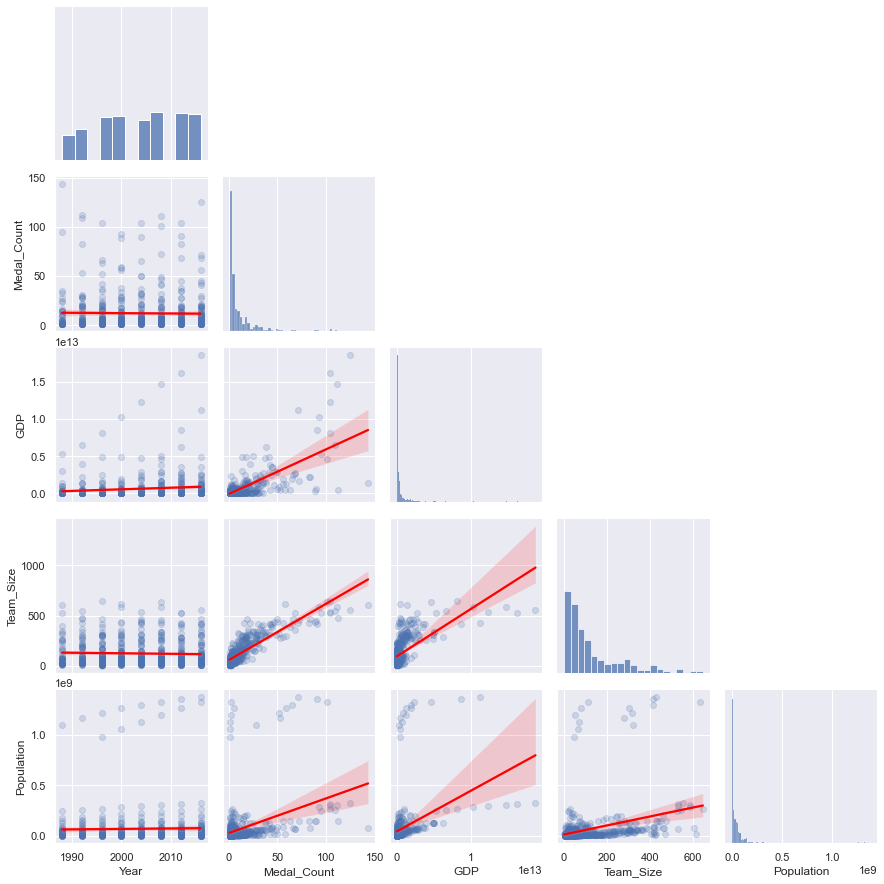

In [24]:
# use sns.pairplot where the variables that we want to plot are ['Medal_Count','GDP','Team_Size','Population']
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(data=train,
             corner=True, 
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 
                       'scatter_kws': {'alpha': 0.2}}); # https://stackoverflow.com/a/47200170/18655576


The pair plot shows every attribute of our dataset plotted against every attribute of our datset. On the diagnoal we see the histogram showing the distribution of the data. Where the data is highly skewed or where the relationship does not look to fit a linear pattern then we may wish to alter our features for the log of the value of the attribute is used instead of the raw value of the attribute itself. 
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

In [25]:
train['Log_GDP'] = train['GDP'].apply(np.log) # use the pnadas .apply method to create a new column that will be the log of the original value. Call hte new column "Log_GDP"
train['Log_Population'] = train['Population'].apply(np.log) # use the pnadas .apply method to create a new column that will be the log of the original value. Call hte new column "Log_Population"
train['Log_team_size'] = train['Team_Size'].apply(np.log) 
#because log(gdp/pop) = log(gdp) - log(pop) #  lets introduce a new column called "Log_GDP_PC". This is to log of the gdp divided by the log of the poulation. 
# Remember mathmatically dividing a log is the same as sibtracting toe log of the numerator from the log of the denominator 
train['Log_GDP_PC'] = train['Log_GDP'] - train['Log_Population'] 

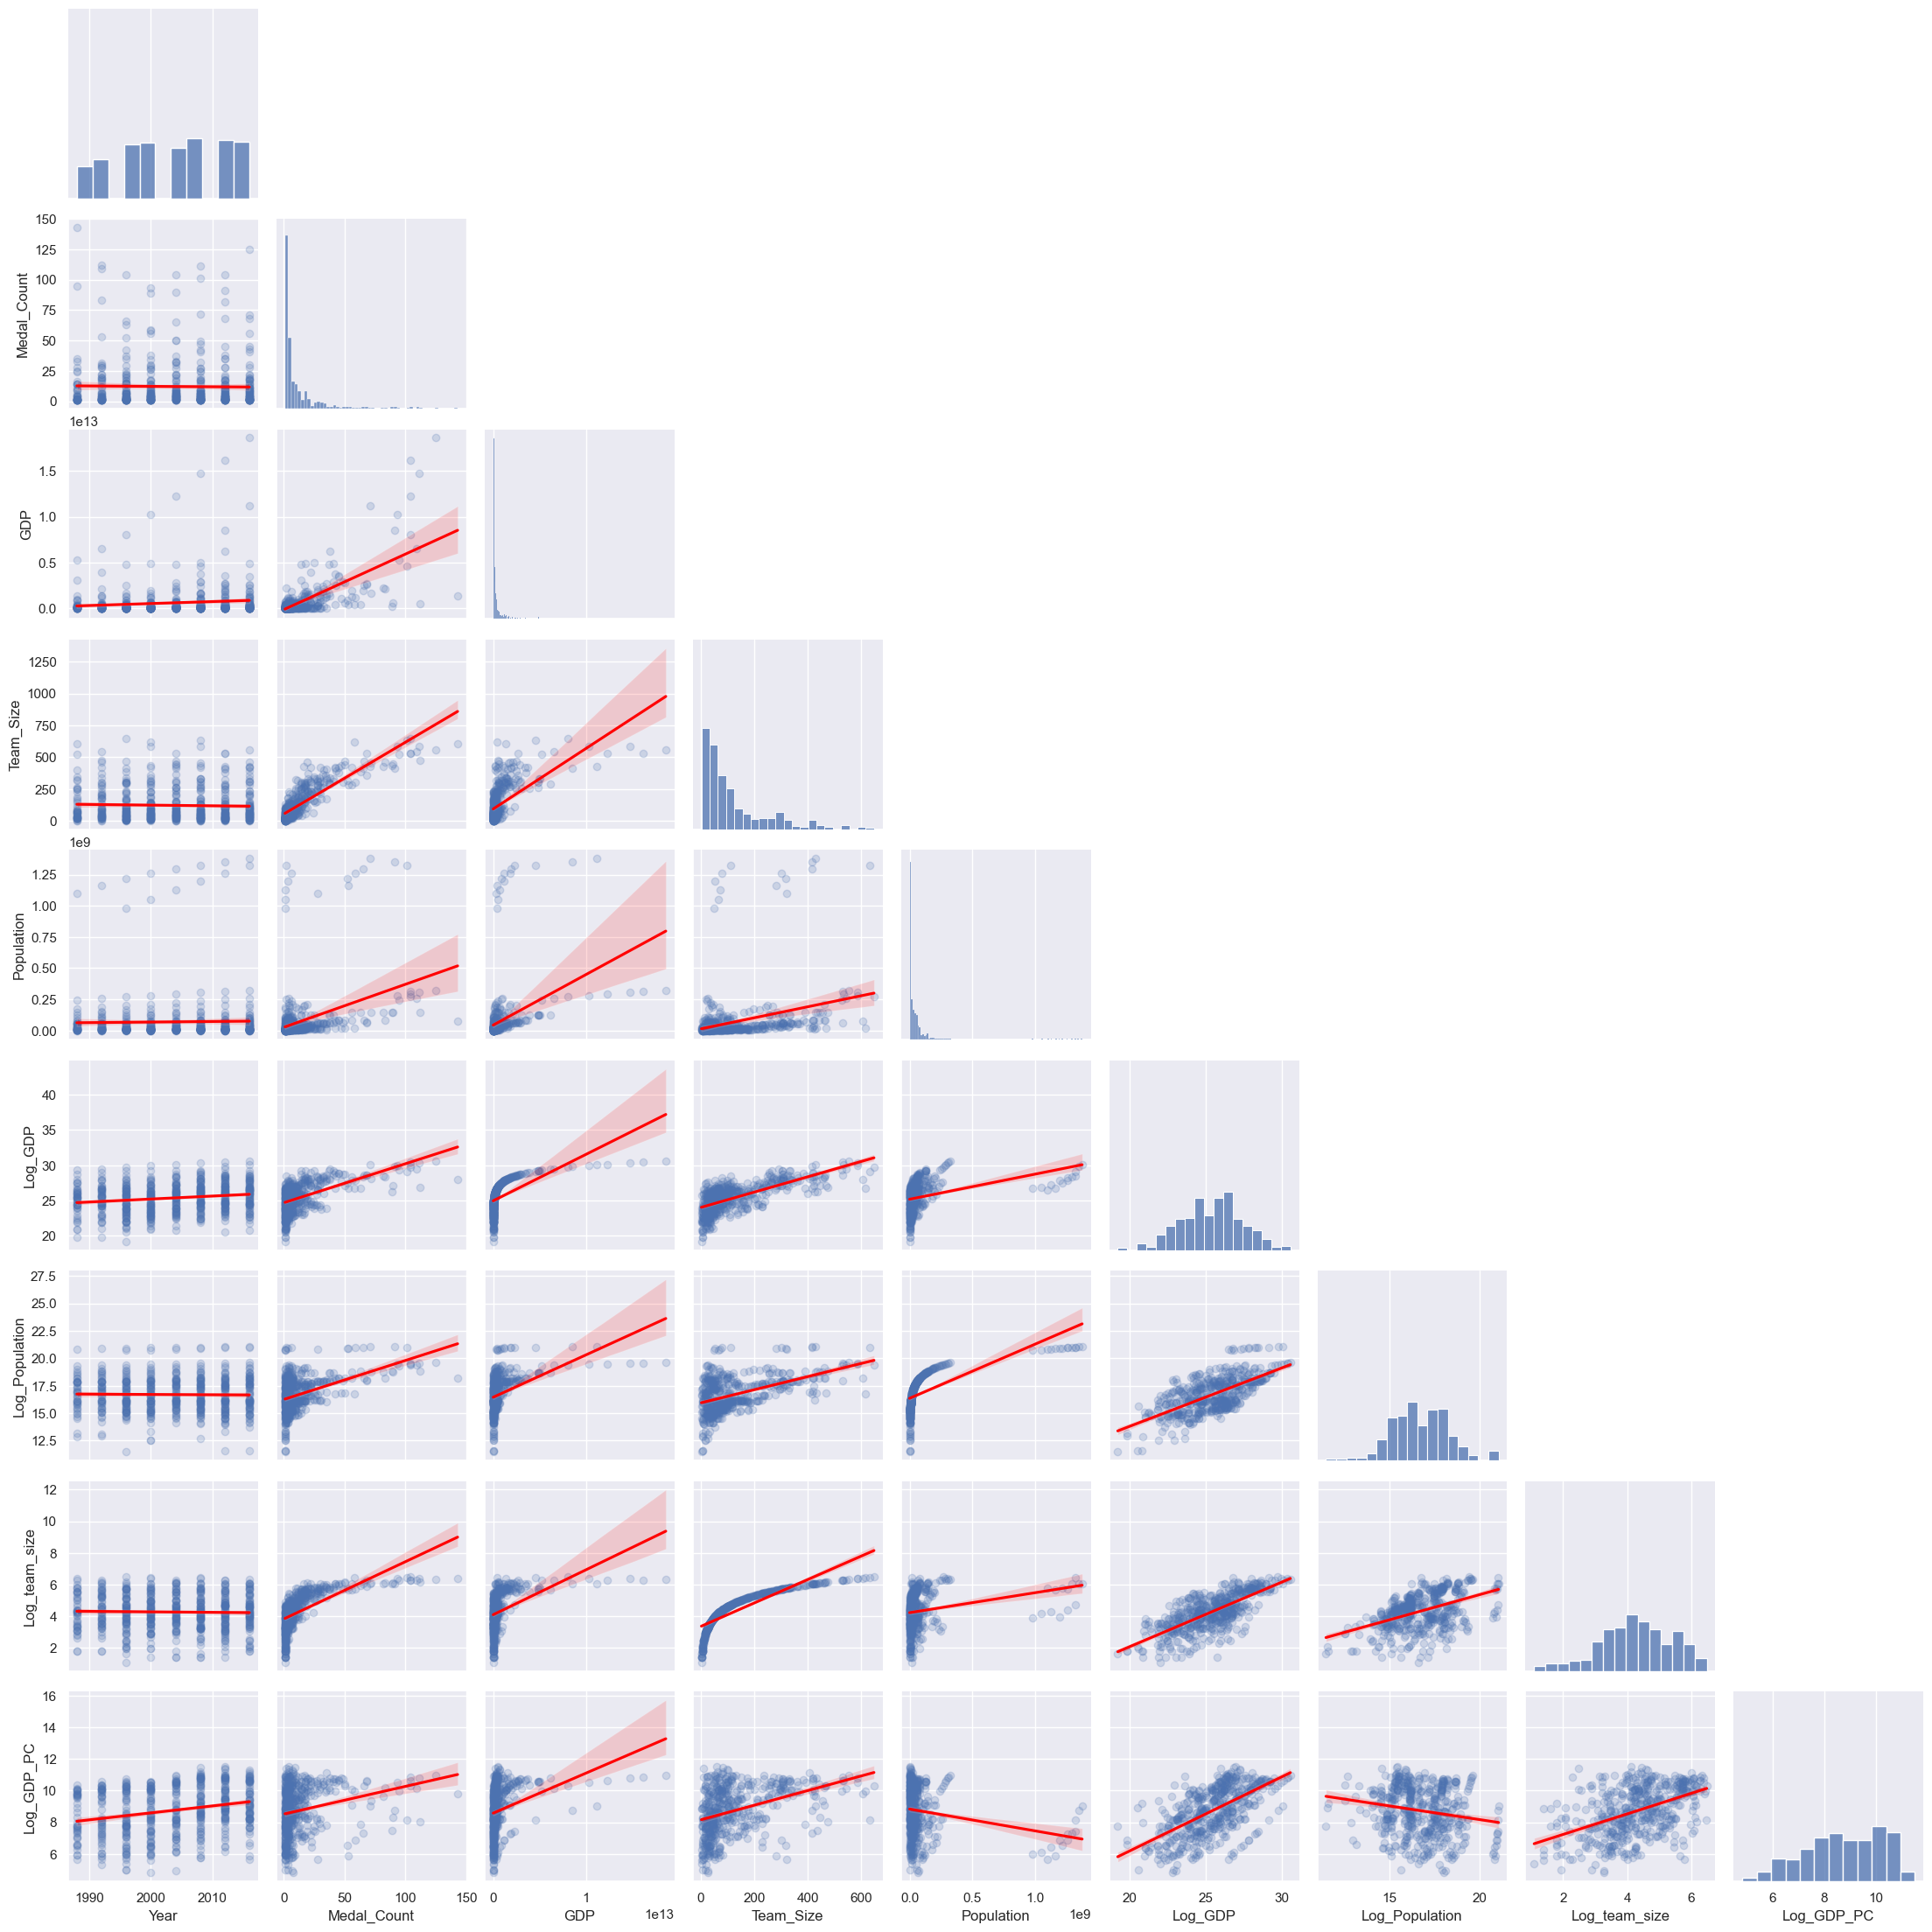

In [26]:
sns.pairplot(data=train,
             corner=True, 
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 
                       'scatter_kws': {'alpha': 0.2}}); # https://stackoverflow.com/a/47200170/18655576

It can be observed now that where we took the log of a column the histogram takes a more *normal* shape 

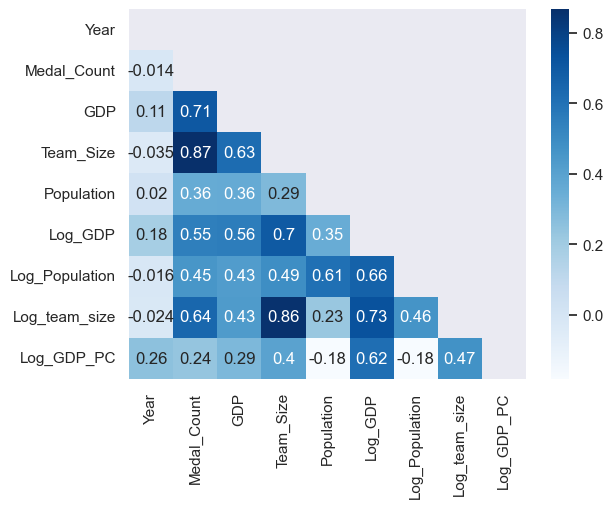

In [27]:
#  create a new variable called corr. This will contain the correlation coefficients betweem all of the variables 
# The default correlation paramter is the pearson, however others are available 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
corr = train.corr() #  create corr
sns.heatmap(corr,
            annot=True,
            cmap='Blues',
            mask = np.triu(corr)); # This masks the top right of the heatmap that is a repeat of the data bottom left# use sns.heatmap to plot corr https://seaborn.pydata.org/generated/seaborn.heatmap.html

<div class="alert alert-block alert-warning">
<b>Question</b>
q5 What is the correlation between team count and Medal Count?<br>
</div>

In [28]:
# q5 q5 What is the correlation between team count and Medal Count??
# ans.q5_check_answer()
# ans.q5_get_answer()

### Selecting our varibales for regression 

- Where possible use domain specific knowledge to use variables that you believe should effect the target variable
- Think about including interaction terms. For example if it was found that smoking increased risk of cancer, and also that lack of exercise increased risk of cancer, however a combination of both subtationaly increased your risk of cancer you may wish to included an input variable that is the product of both of these. This is more appropiate in predictive regression as opposed to explanatory regression 
- Avoid variables that have a small amount of variation
- Avoid collinearity when selecting your predicitors. When two or more variables in a model are correlated in some way then there is a degree of collinearity. This is not a binary issue and most models will have it to some degree. Wehn variables are highly correlated it becomes hard to correctly estimate the contribution of each variable to the target variable. 

We are going to start of by using the raw untransformed columns because the correlation matrix has indidcated they correlated well with the target variable. Remeber the target variable here is the medal count. The features we are using are team size population and and GDP. It should be noted that team size and GDP are quite highly correlated however shall work with this for now 

In [29]:
 #  import models to use for regression
from sklearn.metrics import mean_squared_error as mse
import statsmodels.formula.api as smf

In [34]:
#train models on data upto 2012
#predict on 2016 -  create prediction dataset
X_tst = train.loc[train.Year == 2016].dropna()[['Team_Size','GDP','Population']] #  select only the data that is year 2016, chose only ['Team_Size','GDP','Population'] and  drop na
y_tst = train.loc[train.Year == 2016].dropna()['Medal_Count'] #  Select only for the year 2016 with the only column as 'Medal_Count'. Drop na

In [35]:
OLS = smf.ols('Medal_Count ~ Team_Size + GDP + Population', data=train.loc[train.Year!=2016]).fit() #  fit the model on the data when the year is not 2016. Use the medal count as the target and team size gdp and population as features
OLS.summary() #  see a summary of results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Medal_Count   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     596.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          6.29e-157
Time:                        08:29:48   Log-Likelihood:                -1664.3
No. Observations:                 457   AIC:                             3337.
Df Residuals:                     453   BIC:                             3353.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9496      0.623     -6.343      0.000      -5.173      -2.726
Team_Size      0.1124      0.004     26.005      0.000       0.104       0.121
GDP          2.63e-12   3.58e-13      7.337      0.000    1.93e-12    3.33e-12
Population  9.219e-09   2.39e-09      3.863      0.000    4.53e-09    1.39e-08
==============================================================================
Omnibus:                      245.181   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4385.558
Skew:                           1.888   Prob(JB):                         0.00
Kurtosis:                      17.699   Cond. No.                     2.44e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
y_ols = OLS.predict(X_tst) # test the accuracy of our model on the test data. The test data contains only the year 2016
ols_score = OLS.rsquared #R^2 # find the r squared of the test data. We use the rsquared method for this
ols_err = np.sqrt(mse(y_tst, y_ols)) #rms error find the root mean square error. Take the square root of the function mse with arguments of ground truth and prediction 
print('Statsmodels OLS R^2: {}, Statsmodels OLS RMSE: {}'.format(ols_score,ols_err)) # print the results out 

Statsmodels OLS R^2: 0.7980934949275181, Statsmodels OLS RMSE: 9.114305071094421


Lets try to see if using the log transform of the raw features improved our results

In [45]:

X_tst_log = train.loc[train.Year == 2016].dropna()[['Log_team_size','Log_GDP','Log_Population']] # #  select only the data that is year 2016, chose only ['Log_team_size','Log_GDP','Log_Population'] and  drop na
y_tst_log = train.loc[train.Year == 2016].dropna()['Medal_Count'] # #  Select only for the year 2016 with the only column as 'Medal_Count'. Drop na

In [46]:
OLS_log = smf.ols('Medal_Count ~ Log_team_size + Log_GDP + Log_Population', data=train.loc[train.Year!=2016]).fit() # fit the model on the data when the year is not 2016. Use the medal count as the target and team size gdp and population as features
OLS_log.summary() # get a summary of the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Medal_Count   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     123.6
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.76e-58
Time:                        07:55:36   Log-Likelihood:                -1893.3
No. Observations:                 457   AIC:                             3795.
Df Residuals:                     453   BIC:                             3811.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.3515     10.912     -7.089      0.000     -98.795     -55.908
Log_team_size     10.2530      0.949     10.802      0.000       8.388      12.118
Log_GDP            0.1265      0.615      0.206      0.837      -1.082       1.335
Log_Population     2.5395      0.598      4.246      0.000       1.364       3.715
==============================================================================
Omnibus:                      278.734   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2395.934
Skew:                           2.576   Prob(JB):                         0.00
Kurtosis:                      12.964   Cond. No.                         470.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
y_ols_log = OLS_log.predict(X_tst_log)# test the accuracy of our model on the test data where the logs were used. The test data contains only the year 2016
ols_score = OLS_log.rsquared #R^2
ols_err = np.sqrt(mse(y_tst, y_ols)) #rms error
print('Statsmodels OLS R^2: {}, Statsmodels OLS RMSE: {}'.format(ols_score,ols_err)) # print the results

Statsmodels OLS R^2: 0.45025686277546806, Statsmodels OLS RMSE: 8.361676681788412


<div class="alert alert-block alert-warning">
<b>Question</b>
q 6 Which model was better; model 1 the used features without logs or model 2 that used features with logs. Enter answer as 1 or 2 ?<br>
</div>

It is clear the regression without the log transform was working better so we shall use that as we proceed with the analysis



In [35]:
# q 6 Which model was better; model 1 the used features without logs or model 2 that used features with logs. Enter answer as 1 or 2 ?
# ans.q6_check_answer()
# ans.q6_get_answer()

The coefficients indidcate that team size has the biggest effect on medal count, even given the scales that GDP and population are measured in. Using this type of analysis is useful for gaining both an insight into the factors that effect medal count at the games, but it also allows us to make predictions. However if we just wanted to predict the future medal count of an olympic games we also have access to the medal count from that team at the games prior to the one we are trying to predict. It is suspected that this factor alone will be a strong predictor however when combined with the other factors we have investigated it is likely to give an even better medal count prediction Therefore lets introduce previous games medal count for each team to give improved predicitve power. 

In [36]:

train['previous_year'] = train.Year - 4 #  add a column to the df train called 'previous year' . THis will be the year the previous olympiad
# merge train dataframe and medals by country on previous year , country and year and country
train = pd.merge(train, medals_by_country, left_on = ['previous_year', 'Country'], right_on = ['Year', 'Country'])
train =  train.drop(columns = ['previous_year', 'Year_y']) # drop columns we dont need
train = train.rename(columns = {'Medal_Count_y' : 'prev_medal', 'Year_x': 'Year'}) # rename columns to more appropriate names
train = train.rename(columns = {'Medal_Count_x' : 'Medal_Count'}) # rename columns to more apporopriate names 
train

,Year,Country,Medal_Count,GDP,Team_Size,Population,Log_GDP,Log_Population,Log_team_size,Log_GDP_PC,prev_medal
0,1992,Argentina,1.0,2.287890e+11,111,33655151.0,26.156066,17.331677,4.709530,8.824389,2.0
1,1992,Australia,28.0,3.256930e+11,390,17495000.0,26.509221,16.677426,5.966147,9.831795,14.0
2,1992,Austria,2.0,1.950780e+11,127,7840709.0,25.996665,15.874840,4.844187,10.121825,1.0
3,1992,Belgium,3.0,2.360380e+11,103,10045158.0,26.187259,16.122601,4.634729,10.064657,2.0
4,1992,Brazil,3.0,4.005990e+11,233,154564278.0,26.716227,18.856121,5.451038,7.860106,6.0
...,...,...,...,...,...,...,...,...,...,...,...
422,2016,Turkey,8.0,8.637120e+11,119,79512426.0,27.484505,18.191424,4.779123,9.293081,5.0
423,2016,UK,68.0,2.647900e+12,478,65637239.0,28.604788,17.999654,6.169611,10.605134,68.0
424,2016,USA,125.0,1.862450e+13,719,323127513.0,30.555499,19.593558,6.577861,10.961941,104.0
425,2016,Ukraine,11.0,9.327048e+10,272,45004645.0,25.258769,17.622276,5.605802,7.636493,20.0


In [37]:
# fit the linear regression algorithm to team size gdp population and prev_medal
# fit OLS algorith using 'Team_Size + GDP + Population + prev_medal' as predictors and 'Medal_Count' as the target. 
# Remeber to include all data apart from the data where the training year is 2016
OLS = smf.ols('Medal_Count ~ Team_Size + GDP + Population + prev_medal', data=train.loc[train.Year!=2016]).fit() 

X_tst = train.loc[train.Year==2016].dropna()[['Team_Size', 'GDP', 'Population', 'prev_medal']] # set an X_tst variable from variable train that includes only the year 2016. Include only the columns that are your predictors
y_tst = train.loc[train.Year==2016].dropna()[['Medal_Count']] # set a y_tst variable that contains only the medal count from the year 2016
y_ols = OLS.predict(X_tst) # make predictions on the X_tst data
ols_score = OLS.rsquared #R^2
ols_err = np.sqrt(mse(y_tst, y_ols)) #rms error
print('Statsmodels OLS R^2: {}, Statsmodels OLS RMSE: {}'.format(ols_score,ols_err))

Statsmodels OLS R^2: 0.9338011764213806, Statsmodels OLS RMSE: 5.838797097234338


In [38]:
OLS.summary() # view a summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Medal_Count   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          7.35e-195
Time:                        15:25:25   Log-Likelihood:                -1055.4
No. Observations:                 338   AIC:                             2121.
Df Residuals:                     333   BIC:                             2140.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5182      0.463     -3.280      0.001      -2.429      -0.608
Team_Size      0.0317      0.003     10.520      0.000       0.026       0.038
GDP          1.06e-12    2.3e-13      4.613      0.000    6.08e-13    1.51e-12
Population  7.701e-09   1.54e-09      5.004      0.000    4.67e-09    1.07e-08
prev_medal     0.6076      0.026     23.771      0.000       0.557       0.658
==============================================================================
Omnibus:                       66.591   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              676.992
Skew:                           0.429   Prob(JB):                    9.84e-148
Kurtosis:                       9.880   Cond. No.                     2.99e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see an impressive R squared of 0.93. Whilst this could have been expected given the correlation between passed and previous performance the other factors did aid in increasing the predicitve power of the model. On average the prediction was wrong by only 5 medals. 

We can now look at visualising our results using a variety of plots

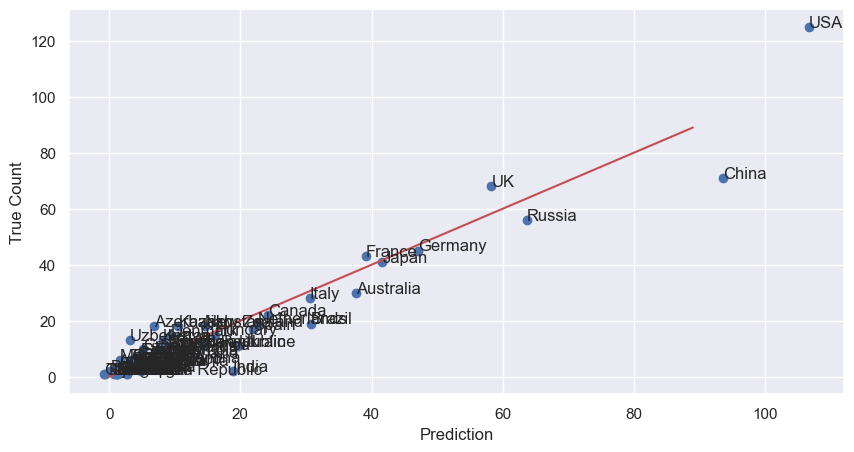

<Figure size 1000x400 with 0 Axes>

In [39]:
# make a new variable called results that is equal to the train variable in the year 2916 and contains columns of 
#['Medal_Count', 'Log_GDP_PC', 'prev_medal', 'Year', 'Country']

results = train[train.Year == 2016][['Medal_Count', 'Log_GDP_PC', 'prev_medal', 'Year', 'Country']]
results['Medal_Pred'] = y_ols # set a new column in results called 'Medal_Pred' that contains the predicted medal count
results.dropna(inplace = True) # drop all na. Set in place
results.reset_index() # reset the index


fig = plt.figure(figsize = (10, 5)) # plot a scatter graph of medal_Pred V Medal_Count
plt.scatter(results.Medal_Pred, results.Medal_Count)

for i in range(len(results)): # add labels to the scatter graph
    plt.annotate(results.Country.iloc[i], (results.Medal_Pred.iloc[i], results.Medal_Count.iloc[i]))
plt.plot(range(90), range(90), 'r') # add a line that shows perfect prediction
    
plt.xlabel('Prediction')
plt.ylabel('True Count')
fig = plt.figure()
fig.set_size_inches(10, 4)

We can also plot out results in terms of country and the prediction against the true count

Text(0.5, 0, 'Country')

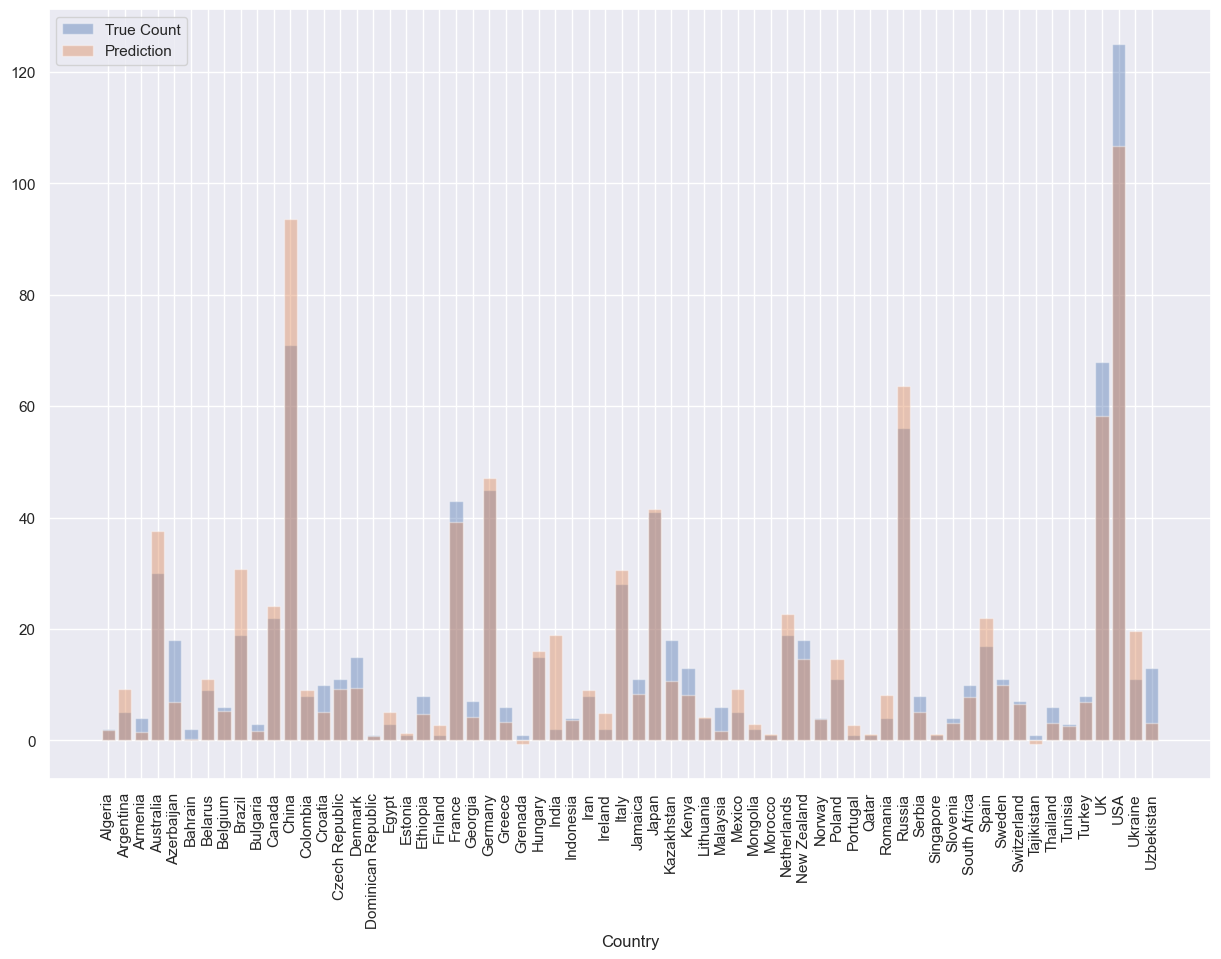

In [40]:
fig = plt.figure(figsize = (15, 10))
plt.bar(results.Country, height = results.Medal_Count, alpha = 0.4, label = 'True Count')
plt.bar(results.Country, height = results.Medal_Pred, alpha = 0.4, label = 'Prediction')
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('Country')


<div class="alert alert-block alert-warning">
<b>Question</b>
q 7 What was the error in medals for the France in the 2016 olympic games   ?<br>
</div>

In [46]:
results.query('Country == "France"')

# q 7 What was the error in medals for the France in the 2016 olympic games   ??
# ans.q7_check_answer()
# ans.q7_get_answer()

,Medal_Count,Log_GDP_PC,prev_medal,Year,Country,Medal_Pred
381,43.0,10.514744,35.0,2016,France,39.116144


## Conclusion

Looks like we can make decent predictions based on a simple linear model with Team Size, GDP, and Population.

The R^2 value signifies the percetage of variation in the medals tally that is accounted for by the model.
The RMS error implies that the models can predict the medals tally of a country within about 10-11 medals if we ignore the medal count from the previous games and around 5 medals if we include medals from the previous games. 